In [1]:
import random
import numpy as np
from collections import Counter
from itertools import product

In [2]:
def run_experiment():
    """
    Runs the Experiment On A Six Sided Die
    Returns the Number Of Rolls required to reduce to a single number
    """
    turns = 0
    all_die = [1+x for x in range(6)]
    while 1 != len(set(all_die)):
        all_die = [random.choice(all_die) for x in all_die]
        turns += 1
    return turns

In [3]:
# Sample it to see what we are looking at
distributions = [run_experiment() for x in range(100_000)]

9.65541


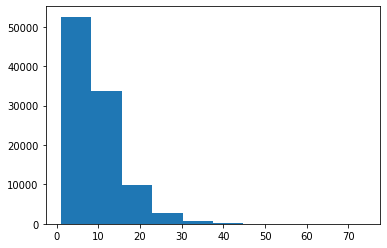

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot it to look at the distribution
plt.hist(distributions)
print(np.mean(distributions))

In [5]:
# Start Working On Closed Form Solution By Brute Forcing Transition Matrix
# States will be the distribution of counts of die faces
# e.g. (1,1,1, 1,1,1) Will Be the initial State
# (3, 3) Will be two faces have three sides each
# (6,) Will be the goal state (single number on every die)

#Calculate all possible rolls of a 6 sided die
die = [1 + x for x in range(6)]
all_rolls = []
for elem in product(die, repeat=6):
    all_rolls.append(elem)

In [6]:
# Convert the rolls to number of transitions between possible states as outlined above
def to_counts(rolls):
    c = Counter()
    for elem in rolls:
        c[elem] += 1
    return tuple(sorted(c.values()))

transition_weights = Counter()
for elem in all_rolls:
    transition_weights[to_counts(elem)] += 1

states = sorted(transition_weights.keys(), key=lambda x: len(x), reverse=True) # Save for later will be lookup into transition matrix
transition_weights

Counter({(6,): 6,
         (1, 5): 180,
         (2, 4): 450,
         (1, 1, 4): 1800,
         (3, 3): 300,
         (1, 2, 3): 7200,
         (1, 1, 1, 3): 7200,
         (2, 2, 2): 1800,
         (1, 1, 2, 2): 16200,
         (1, 1, 1, 1, 2): 10800,
         (1, 1, 1, 1, 1, 1): 720})

In [7]:
def get_transition_probabilities(state, states):
    """
    state: Distribution of Die Faces to Calculate
    states: Ordering of possible states to calculate probabilities for
    """
    dice = []
    for number in range(len(state)):
        desired_count = state[number]
        for count in range(desired_count):
            dice.append(number)
    all_rolls = []
    for roll in product(dice, repeat=6):
        all_rolls.append(roll)
    
    transition_weights = Counter()
    for elem in all_rolls:
        transition_weights[to_counts(elem)] += 1
    return [transition_weights[x]/sum(transition_weights.values()) for x in states]

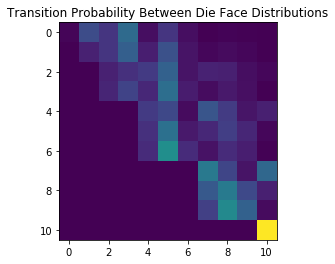

In [8]:
# Calculate Transition Matrix
transition_matrix = np.zeros((len(states), len(states)))
for i, state in enumerate(states):
    transition_matrix[i] = get_transition_probabilities(state, states)
plt.title("Transition Probability Between Die Face Distributions")
plt.imshow(transition_matrix)

In [9]:
import numpy.linalg

def find_steps_between_states(start_state, goal_state, states, transition_matrix):
    """
    Find the expected value going from start_state to goal_state through the transition_matrix
    http://www.ryanhmckenna.com/2015/04/markov-chains-and-expected-value.html
    """
    start = states.index(start_state)
    stop = states.index(goal_state)
    
    g2 = np.delete(transition_matrix, stop, axis=0)
    g2 = np.delete(g2, stop, axis=1)
    
    eye = np.eye(len(g2))
    g2 = eye - g2
    
    if start > stop:
        start -= 1
    try:
        return numpy.linalg.solve(g2, np.ones((len(g2),)))[start]
    except:
        return numpy.linalg.lstsq(g2, np.ones((len(g2),)))[0][start]

In [10]:
print("Closed Form Expected Value Number Of Rolls\nGoing From Fair 6-sided Die to Single Value")
find_steps_between_states((1, 1, 1, 1, 1, 1), (6,), states, transition_matrix)

Closed Form Expected Value Number Of Rolls
Going From Fair 6-sided Die to Single Value


9.65599148388557